In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '\data\Chennai_house_univariate_train.csv'
raw_data = pd.read_csv(path)
raw_data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [3]:
raw_data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


In [4]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


In [5]:
data.min()

Size    -0.182399
Price   -0.169891
dtype: float64

In [6]:
data.max()

Size     0.817601
Price    0.830109
dtype: float64

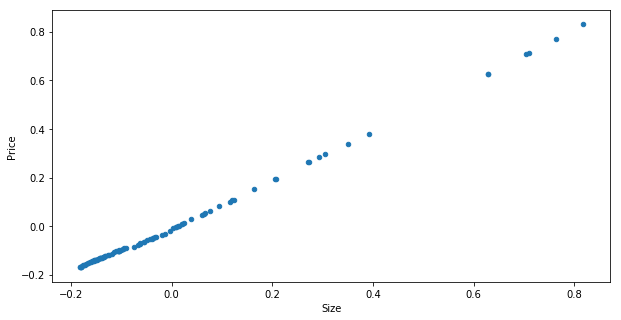

In [7]:
data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5))

In [8]:
data.shape

(97, 2)

In [9]:
cols = data.shape[1]
print (cols)

2


In [10]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [11]:
cols = data.shape[1]
print (cols)

3


In [12]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [13]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [14]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
def computeError(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    
    return np.sum(inner) / (2 * len(x))

In [16]:
computeError(x, y, theta)

0.024346853685025278

In [17]:
Learn_rate= 1
iters = 150
def gradientDescent(x, y, theta, Learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate/ len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeError(x, y, theta)
        
    return theta, cost

In [18]:
new_theta, cost = gradientDescent(x, y, theta, Learn_rate, iters)
print(new_theta, cost)

[[ -1.02116196e-16   9.82955251e-01]] [  2.19673183e-02   1.98208708e-02   1.78846789e-02   1.61381471e-02
   1.45626971e-02   1.31415706e-02   1.18596508e-02   1.07033016e-02
   9.66022291e-03   8.71931915e-03   7.87058178e-03   7.10498263e-03
   6.41437789e-03   5.79142147e-03   5.22948685e-03   4.72259664e-03
   4.26535895e-03   3.85291006e-03   3.48086268e-03   3.14525926e-03
   2.84252994e-03   2.56945453e-03   2.32312827e-03   2.10093094e-03
   1.90049899e-03   1.71970039e-03   1.55661194e-03   1.40949886e-03
   1.27679627e-03   1.15709258e-03   1.04911449e-03   9.51713408e-04
   8.63853270e-04   7.84599488e-04   7.13109024e-04   6.48621422e-04
   5.90450714e-04   5.37978129e-04   4.90645505e-04   4.47949357e-04
   4.09435518e-04   3.74694309e-04   3.43356182e-04   3.15087786e-04
   2.89588427e-04   2.66586861e-04   2.45838419e-04   2.27122393e-04
   2.10239700e-04   1.95010753e-04   1.81273561e-04   1.68881998e-04
   1.57704253e-04   1.47621426e-04   1.38526264e-04   1.30322020e

In [19]:
computeError(x, y, new_theta)

5.4775860762987278e-05

In [20]:
x = data.Size
print(x)

0    -0.182399
1    -0.181840
2    -0.180786
3    -0.180507
4    -0.179878
5    -0.177695
6    -0.176390
7    -0.173526
8    -0.172996
9    -0.169270
10   -0.166184
11   -0.166051
12   -0.161876
13   -0.160275
14   -0.158528
15   -0.155431
16   -0.154890
17   -0.153667
18   -0.153242
19   -0.152433
20   -0.151076
21   -0.148666
22   -0.146721
23   -0.146663
24   -0.142762
25   -0.142588
26   -0.141511
27   -0.141231
28   -0.138920
29   -0.137307
        ...   
67    0.007877
68    0.012989
69    0.014474
70    0.020808
71    0.020889
72    0.024354
73    0.038752
74    0.059408
75    0.063367
76    0.066977
77    0.075326
78    0.093671
79    0.115055
80    0.120877
81    0.123090
82    0.162854
83    0.206112
84    0.206578
85    0.271785
86    0.272250
87    0.292045
88    0.304737
89    0.349567
90    0.392883
91    0.627919
92    0.628734
93    0.705061
94    0.709195
95    0.763806
96    0.817601
Name: Size, Length: 97, dtype: float64


In [21]:
Model_price = new_theta[0, 0] + (new_theta[0, 1] * x) 

Text(0.5,1,'Predicted Price vs. Size')

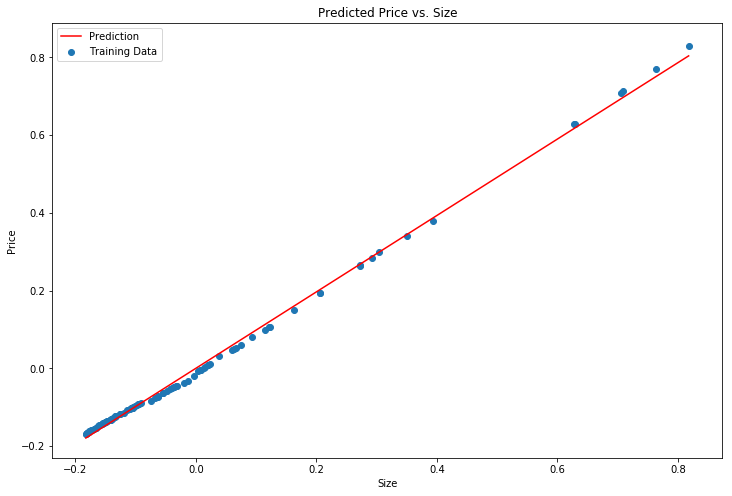

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, Model_price, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')

Text(0.5,1,'Error vs. Iterations')

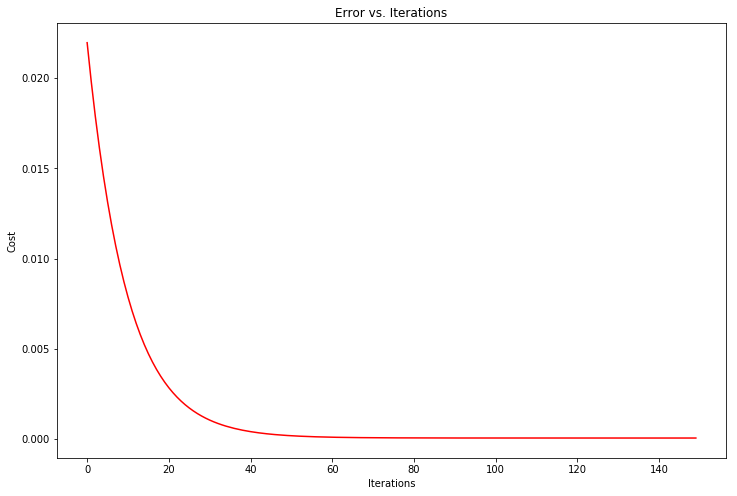

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [24]:
import math
erro_r = [np.power((b-a),2) for (a, b) in zip(Model_price, y)] #mean absolute percentage error
error0 = np.sum(erro_r)

error=(error0/len(y))*100

print("error % = {}".format(error))
accuracy= 100 - error
print("accuracy %={}".format(accuracy))

error % = 0.010955172152597467
accuracy %=99.98904482784741


In [25]:
def predict(new_theta,accuracy):
    #get input from the user
    size = float(input("enter the size of the House in sqt:"))
    
    #mean Normalisation
    size = (size - raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
    
    #model
    price=(new_theta[0,0] + (new_theta[0,1] *size))
    
    #Reverse Mean Normalisation
    Predicted_Price = (price* (raw_data.Price.max()-raw_data.Price.min())) + (raw_data.Price.mean())
    
    Price_at_Max_Accuracy = (Predicted_Price *(1/accuracy)*100)
    
    Price_range =  Price_at_Max_Accuracy - Predicted_Price
    
    return Predicted_Price, Price_range

In [26]:
Predicted_Price, Price_range= predict(new_theta, accuracy)
print('Your house cost is ' + str(Predicted_Price) + ' Lakhs' + '(+ or -) ' + str(Price_range) + ' Lakhs')

enter the size of the House in sqt:1234
Your house cost is 39.0701560076 Lakhs(+ or -) 0.00428067180589 Lakhs
